Accuracy: 0.8888888888888888


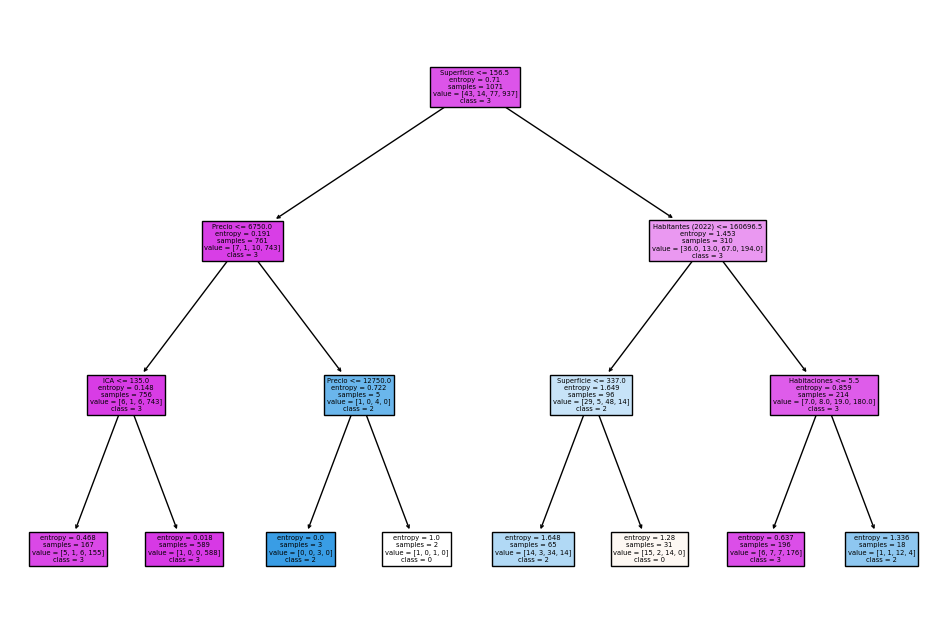

Accuracy: 0.8888888888888888


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ruta_del_archivo = '../data/viviendas_web.xlsx'
#df=pd.read_excel('data/viviendas_web.xlsx', sheet_name='Sheet1')
arbol = pd.read_excel(ruta_del_archivo)
arbol.head()


#Tenemos que transformar el tipo de vivienda a numerico
# Import label encoder 
from sklearn import preprocessing
#label_encoder sabe cómo entender las etiquetas de las palabras.
label_encoder = preprocessing.LabelEncoder()
#Codificar etiquetas en columna
arbol["Tipo_vivienda"]= label_encoder.fit_transform(arbol["Tipo_vivienda"])


prueba_arbol = arbol[["Habitantes (2022)","Rating","ICA","Tipo_vivienda","Precio","Superficie","Habitaciones","Baños","Comprado"]]

feature_cols = ["Habitantes (2022)","Rating","ICA","Precio","Superficie","Habitaciones","Baños","Comprado"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Tipo_vivienda']


from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# crear arbol de decision
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifier object using entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf_entropy = clf_entropy.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf_entropy.predict(X_test)


print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Convertir las etiquetas de clase a cadenas si es necesario
class_names_str = [str(class_) for class_ in clf_entropy.classes_]

# Visualizar el árbol de decisión directamente en la salida del código
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=feature_cols, class_names=class_names_str)
plt.show()

# Evaluar la precisión del modelo
y_pred = clf_entropy.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))